In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import seaborn as sns
import numpy as np
# from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm
import joblib
import spacy
nltk.download("punkt")
nltk.download("punkt_tab")
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ghanc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ghanc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
vectorizer = joblib.load("tfidf_vectorizer_rf.pkl")
model      = joblib.load("final_rf_tfidf.pkl")

In [ ]:
test_df = pd.read_csv("news_testData_randomSubset.csv")  
test_df["title"] = test_df["title"].str.strip().str.lower()  

X_test_text = test_df["title"]
y_test_labels = test_df["labels"]

X_test_transformed = vectorizer.transform(X_test_text)

y_test_pred = model.predict(X_test_transformed)

print("Test Set Performance:")
print(classification_report(y_test_labels, y_test_pred, target_names=["NBC", "FoxNews"]))
print(f"Test Set Accuracy: {accuracy_score(y_test_labels, y_test_pred):.4f}")

Test Set Performance:
              precision    recall  f1-score   support

         NBC       0.70      0.70      0.70        10
     FoxNews       0.70      0.70      0.70        10

    accuracy                           0.70        20
   macro avg       0.70      0.70      0.70        20
weighted avg       0.70      0.70      0.70        20

Test Set Accuracy: 0.7000


<Figure size 432x360 with 0 Axes>

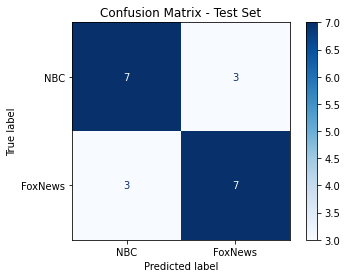

In [5]:
cm_test = confusion_matrix(y_test_labels, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["NBC", "FoxNews"])
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()

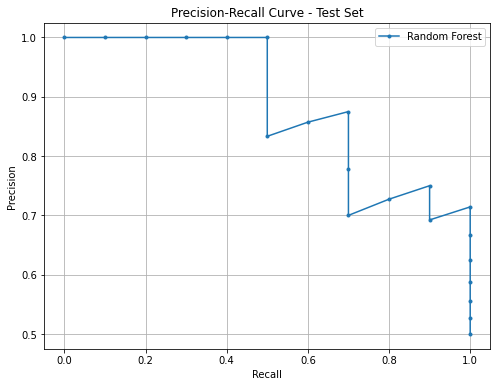

In [7]:
y_test_scores = model.predict_proba(X_test_transformed)[:, 1]

precision, recall, _ = precision_recall_curve(y_test_labels, y_test_scores)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Test Set')
plt.grid(True)
plt.legend()
plt.show()

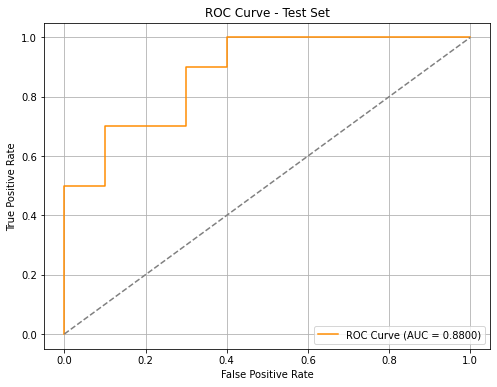

ROC-AUC Score: 0.8800


In [8]:
fpr, tpr, _ = roc_curve(y_test_labels, y_test_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Test Set")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"ROC-AUC Score: {roc_auc:.4f}")